<h2>TITLE : </h2>
<h3>CLASSIFICATION ON BANK MARKETING DATASET</h3>

<h3>GROUP MEMBERS :</h3>

1) MEGHANA  JOSHI <p></p>
2) ISHAAN  PATHAK <p></p>
3) NISHA  BAGUL <p></p>
4) ISHA  NARKHEDE <p></p>

<h3>ABSTRACT OF THE PROBLEM STATEMENT :</h3>
<P>The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).</P>

<h4>POTENTIAL USE CASES :</h4><p></p>
1) This Analysis Will Help Us In Finding Out Whether We Have A Prospective Client .<p></p>
2) This Project Will Be Used In Predicting Whether The Respective Client Will Accept The Next Turn Deposite Or Not . <p></p>
3) The Project Will Help In Creating A Better Makreting Strategy .<p></p>
4) After We Figure Out Our Newly Built Marketing Strategy, It Can Be Implemented In Future . <p></p>

<h4>INSIGHTS INTO CURRENT PROBLEM PROJECT IS TRYING TO INVESTIGATE :</h4>

In [5]:
yes_rows = bank.loc[bank['y'] == 'yes']
yes_rows.shape

(4640, 21)

In [6]:
no_rows = bank.loc[bank['y'] == 'no']
no_rows.shape

(36548, 21)

---->Our Data Set Contains Information Of 41188 People .<p></p>
---->Out Of Which Only 4640 Have Subscribed To The Offer Which Is Around __ONLY__ __10%__ .So This Actually IS A Problem Which We Are Trying To Solve.<p></p>
-----> So We Are Trying To Investigate And Seperate Out That Class Of People Which Is Accepting The Offer And InTurn We Will Come To Know About The Class Which Isn't Accepting The Offer (In The Conclusion Section).<p></p>

<h4>ALGORITHMS USED IN PROJECT :</h4><P></P>
1) Logistic Regression <P></P>
2) Support Vector Machine <P></P>
3) Random Forest Classifier <P></P>
4) Naive Bayes <P></P>
5) Stochastic Gradient Descend <P></P>
6) K Neighbours Classifier <P></P>
7) MLP Classifier <P></P>
ALL THE ALGORITHMS APPLIED ALONG WITH THE CLASSIFICATION REPORTS AND ACCURACIES .

 <h4>IMPORTING SOME IMPORTANT LIBRARIES :</h4>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

<h4> LOADING THE DATASET USING PANDAS: <h4/>

<h4>PERFORMING THE OPERATIONS LIKE head(), info(), describe() etc </h4>

In [2]:
bank = pd.read_excel("bank additional full (F).xlsx")

In [3]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [21]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [10]:
bank.shape

(41188, 21)

In [11]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<h3> DATA EXPLORING :<h3/>

In [12]:
bank.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


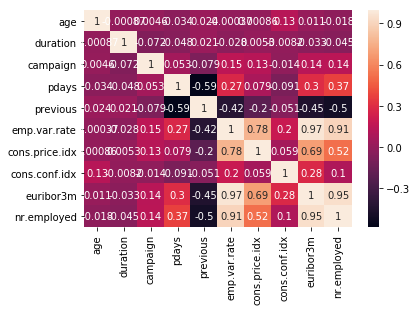

In [25]:
#heatmap for checking out the corelation we are adding co-relation numbers:
sns.heatmap(bank.corr(),annot=True)

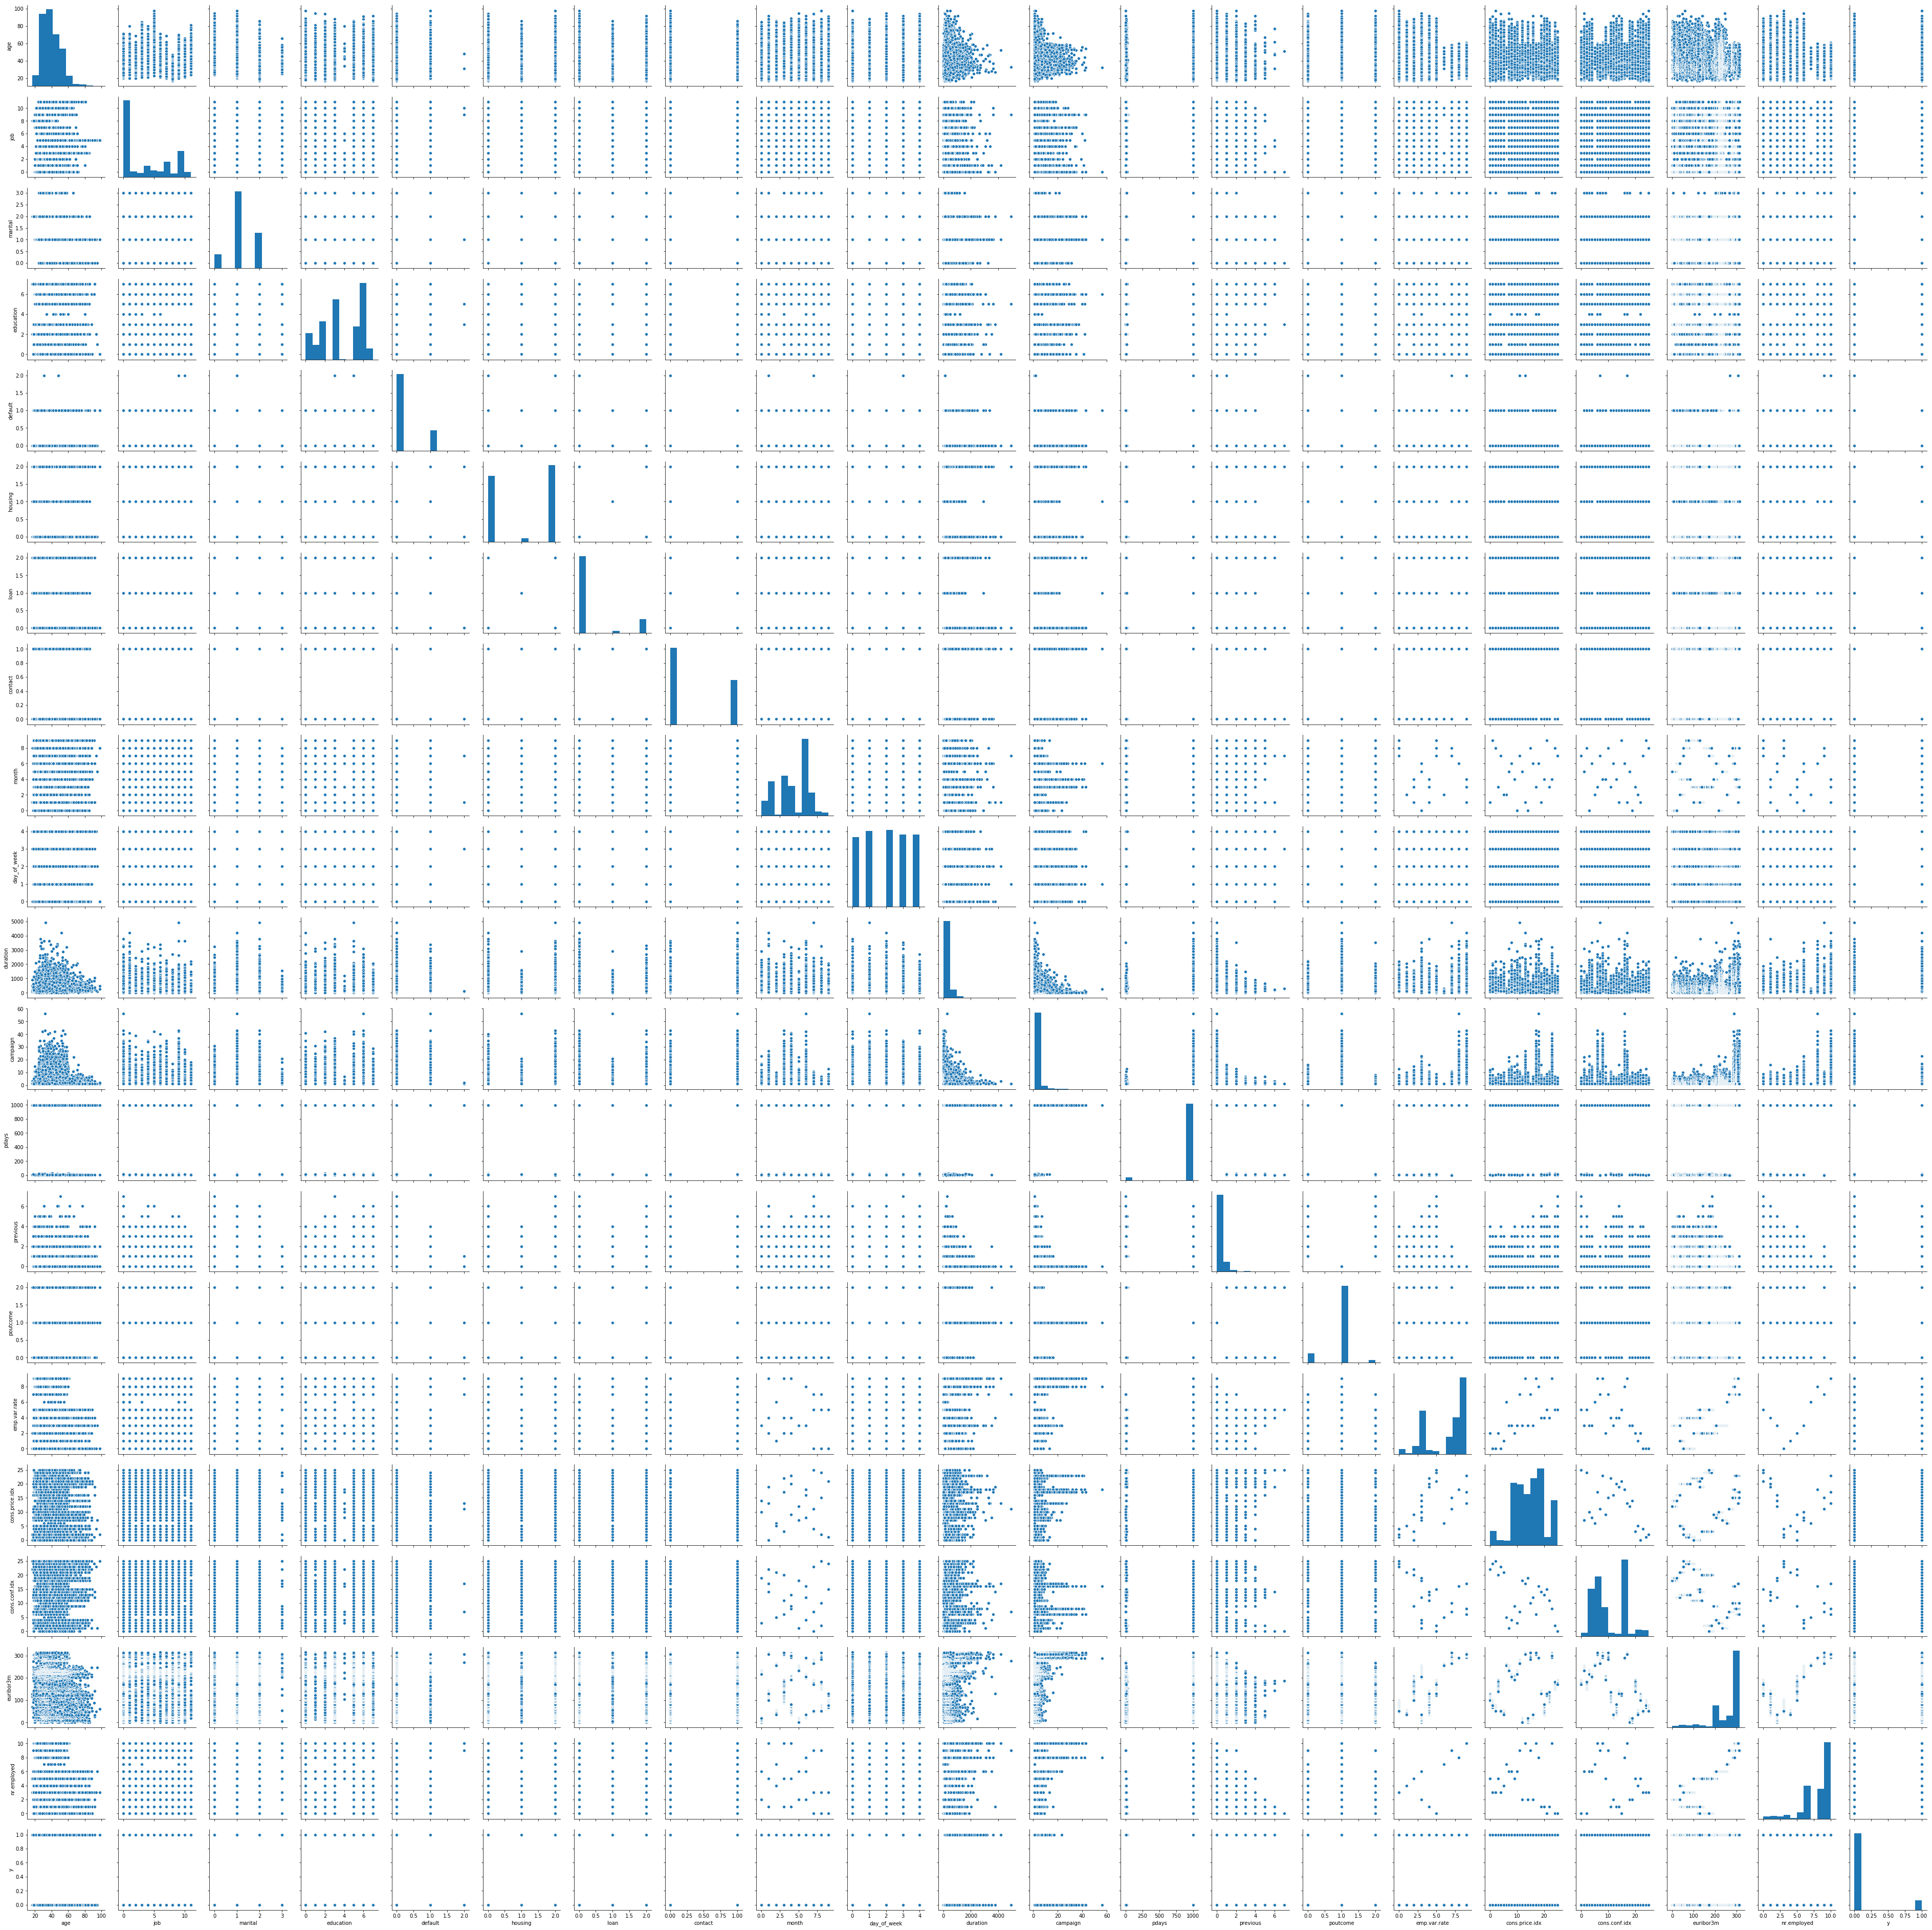

In [55]:
sns.pairplot(bank)

#### LABLE ENCODING

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
bank['job']=le.fit_transform(bank['job'])
bank['marital']=le.fit_transform(bank['marital'])
bank['education']=le.fit_transform(bank['education'])
bank['default']=le.fit_transform(bank['default'])
bank['housing']=le.fit_transform(bank['housing'])
bank['loan']=le.fit_transform(bank['loan'])
bank['contact']=le.fit_transform(bank['contact'])
bank['day_of_week']=le.fit_transform(bank['day_of_week'])
bank['month']=le.fit_transform(bank['month'])
bank['poutcome']=le.fit_transform(bank['poutcome'])
bank['emp.var.rate']=le.fit_transform(bank['emp.var.rate'])
bank['cons.price.idx']=le.fit_transform(bank['cons.price.idx'])
bank['cons.conf.idx']=le.fit_transform(bank['cons.conf.idx'])
bank['euribor3m']=le.fit_transform(bank['euribor3m'])
bank['nr.employed']=le.fit_transform(bank['nr.employed'])
bank['y']=le.fit_transform(bank['y'])

<h4>STORING THE FEATURE MATRIX AND RESPONSE  VECTOR :<h4/>
x = feature matrix<p><p/>
y = response vector

In [15]:
x = bank[bank.columns[:-1]] 
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,8,18,16,287,8
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,8,18,16,287,8
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,8,18,16,287,8
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,8,18,16,287,8
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,8,18,16,287,8


In [16]:
y = bank[bank.columns[-1]] 
y.head()
y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

#### PERFORMING THE TRAIN TEST SPLIT :

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.35, random_state=1)

In [18]:
# Checking Out The Shapes Of Training And Testing Data:
print( "x_test : ",x_test.shape)
print("x_train : ",x_train.shape)
print("y_test : ",y_test.shape)
print("y_train : ",y_train.shape)

x_test :  (14416, 20)
x_train :  (26772, 20)
y_test :  (14416,)
y_train :  (26772,)


<h4>APPLYING VARIIOUS CLASSIFICATION ALGORTIHMS <h4/>

<h5>     1) LOGISTIC REGRESSION :</h5>

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression(random_state=101,solver='lbfgs', max_iter= 2000).fit(x_train, y_train)
predicts=lr.predict(x_test)
a = lr.score(x_train,y_train)
lr_acc = round(a,5)
print("Accuracy Using Logistic Regression Is :", lr_acc*100 ,"%")

# import time
# start = time.time()
# print("--- %s seconds ---" % (time.time() - start))

Accuracy Using Logistic Regression Is : 91.05 %


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


CLASSIFICATION REPORT OF LOGISTIC REGRESSION MODEL :

In [21]:
print(classification_report(y_test,predicts))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12772
           1       0.67      0.42      0.52      1644

   micro avg       0.91      0.91      0.91     14416
   macro avg       0.80      0.70      0.73     14416
weighted avg       0.90      0.91      0.90     14416



<h5>     2) SUPPORT VECTOR MACHINE :</h5>

In [22]:
from sklearn import svm

In [23]:
SVM = svm.LinearSVC().fit(x_train,y_train)
predicts = SVM.predict(x_test)
a = SVM.score(x_train,y_train)
svm_acc = round(a,5)
print("Accuracy Using Support Vector Machine Is :", lr_acc*100 ,"%")

Accuracy Using Support Vector Machine Is : 91.05 %


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


CLASSIFICATION REPORT OF SUPPORT VECTOR MACHINE :

In [24]:
print(classification_report(y_test,predicts))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     12772
           1       0.68      0.39      0.50      1644

   micro avg       0.91      0.91      0.91     14416
   macro avg       0.80      0.68      0.72     14416
weighted avg       0.90      0.91      0.90     14416



<h5>     3) RANDOM FOREST CLASSIFIER :</h5>

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfc = RandomForestClassifier().fit(x_train,y_train)
predicts = rfc.predict(x_test)
a = rfc.score(x_train,y_train)
rfc_acc= round(a,5)
print("Accuracy Using Random Forest Classifier IS :",rfc_acc*100 ,"%" )

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy Using Random Forest Classifier IS : 99.384 %


CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER :

In [27]:
print(classification_report(y_test,predicts))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12772
           1       0.65      0.46      0.54      1644

   micro avg       0.91      0.91      0.91     14416
   macro avg       0.79      0.72      0.75     14416
weighted avg       0.90      0.91      0.90     14416



<h5>    4) NAIVE BAYES :</h5>

In [28]:
from sklearn.naive_bayes import GaussianNB 

In [29]:
gn = GaussianNB().fit(x_train,y_train)
predicts = gn.predict(x_test)
a = gn.score(x_train,y_train)
gn_acc = round(a,5)
print("Accuracy Using Naive Bayes IS :",gn_acc*100, "%")

Accuracy Using Naive Bayes IS : 84.771 %


CLASSIFICATION REPORT USING NAIVE BAYES :

In [30]:
print(classification_report(y_test,predicts))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91     12772
           1       0.40      0.59      0.48      1644

   micro avg       0.85      0.85      0.85     14416
   macro avg       0.67      0.74      0.70     14416
weighted avg       0.88      0.85      0.86     14416



<h5>     5) K NEIGHBOURS CLASSIFIER :</h5>

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knc = KNeighborsClassifier().fit(x_train,y_train)
predicts = knc.predict(x_test)
a = knc.score(x_train,y_train)
knc_acc = round(a,5)
print("Accuracy USing K Neighbours Classifier IS :",knc_acc*100,"%")

Accuracy USing K Neighbours Classifier IS : 93.15299999999999 %


CLASSIFICATION REPORT USING K NEIGHBOURS CLASSIFIER :

In [33]:
print(classification_report(y_test,predicts))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12772
           1       0.61      0.49      0.54      1644

   micro avg       0.91      0.91      0.91     14416
   macro avg       0.77      0.73      0.75     14416
weighted avg       0.90      0.91      0.90     14416



<h5>     6) STOCHASTIC GRADIENT DESCEND:</h5>

In [34]:
from sklearn.linear_model import SGDClassifier

In [35]:
sgd = SGDClassifier().fit(x_train,y_train)
predicts = sgd.predict(x_test)
a = sgd.score(x_train,y_train)
sgd_acc = round(a,5)

print("Accuracy Using Stochastic Gradient Descend :",sgd_acc*100,"%")

Accuracy Using Stochastic Gradient Descend : 90.524 %


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


CLASSIFICATION REPORT USING STOCHASTIC GRADIENT DESCEND :

In [36]:
print(classification_report(y_test,predicts))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     12772
           1       0.59      0.56      0.57      1644

   micro avg       0.91      0.91      0.91     14416
   macro avg       0.77      0.75      0.76     14416
weighted avg       0.90      0.91      0.90     14416



#### USING NEURAL NETWORKS FROM SCIKIT LEARN :

<h5>     7) MLP CLASSIFIER :</h5>

In [37]:
from sklearn.neural_network import MLPClassifier

In [38]:
mlp = MLPClassifier(solver='adam', batch_size=min(300, 5),activation='tanh',alpha=0.0001,hidden_layer_sizes=(100,2)).fit(x,y)
predicts = mlp.predict(x_test)
a = mlp.score(x_train,y_train)
mlp_acc = round(a,5)
print("Accuracy Using MLP Classifier Is :",mlp_acc*100,"%")

Accuracy Using MLP Classifier Is : 90.83 %


CLASSIFICATION REPORT USING MLP CLASSIFIER :

In [39]:
print(classification_report(y_test,predicts))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12772
           1       0.67      0.38      0.49      1644

   micro avg       0.91      0.91      0.91     14416
   macro avg       0.80      0.68      0.72     14416
weighted avg       0.90      0.91      0.90     14416



<h2>*************************** SUMMARY **************************** </h2>

<h4>[A]LIBRARIES USED :</h4><P></P>
1) Pandas <p></p>
2) Matplotlib <p></p>
3) Scikit Learn <p></p>

<h4>[B] MODULES / PACKAGES USED :</h4><p></p>
1) sklearn linear_model <p></p>
2) sklearn svm <p></p>
3) sklearn ensemble <p></p>
4) sklearn naive_bayes <p></p>
5) sklearn neighbors <p></p>
6) sklearn linear_model <p></p>
7) sklearn neural_network <p></p>

#### [C] CONCLUSION

In [9]:
yes_rows.groupby(['marital','pdays','previous']).size().sort_values().tail(10)

marital   pdays  previous
single    6      1             48
divorced  999    1             49
single    3      1             56
married   6      1             81
          3      1             84
single    999    1            152
married   999    1            250
divorced  999    0            323
single    999    0           1085
married   999    0           1725
dtype: int64

1)Most Of The Customers Who Have Those Who Are Married And Have Been Contacted For The First Time Seem To Be Interested In The Offer (Above Piece Of Code Demonstrates That.)<p></p>

In [17]:
yes_rows.groupby(['education']).size().sort_values().tail(20)

education
illiterate                4
basic.6y                188
unknown                 251
basic.4y                428
basic.9y                473
professional.course     595
high.school            1031
university.degree      1670
dtype: int64

2) A Higher Education Decrees A Higher Demand 

In [8]:
yes_rows.groupby(['previous','pdays']).size().sort_values().tail(10)

previous  pdays
3         3          34
1         4          36
3         6          45
2         999        69
          3          82
          6          90
1         6         142
          3         159
          999       451
0         999      3141
dtype: int64

3)The Clients Who Have Outcome of the previous marketing campaign (poutcome) As Non-existent, Are Emphasizing On Accepting The Offer (Above Piece Of Code Demonstrates That).

#### [D] RESULTS

1) From The Acuuracy Report Of All The Algorithms, We Can See That All The Algorithms Which We Have Used Are Giving Around 90% Accuracy Except The Nave Bayes Algorithm Which Is Giving 84.77% Accuracy  <p></p>


<h2>*************************** THANK YOU **************************** </h2>